# Exploring Prosper Loan Data
## by Haya Aldawood

## Preliminary Wrangling

>  *This notebook will explore`prosperLoanData` dataset. This dataset contains 81 varible about differant loans. 
the following section will contain a walkthrogh for dataset with notes and observations included.*

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingkey                           113937 non-null  object 
 1   listingnumber                        113937 non-null  int64  
 2   listingcreationdate                  113937 non-null  object 
 3   creditgrade                          28953 non-null   object 
 4   term                                 113937 non-null  int64  
 5   loanstatus                           113937 non-null  object 
 6   closeddate                           55089 non-null   object 
 7   borrowerapr                          113912 non-null  float64
 8   borrowerrate                         113937 non-null  float64
 9   lenderyield                          113937 non-null  float64
 10  estimatedeffectiveyield              84853 non-null   float64
 11  estimatedloss

### What is the structure of your dataset?

> 113,937 rows and 81 column

### What is/are the main feature(s) of interest in your dataset?

> I have the following questions which I would like to answer:
>- How interst rate is being effected by term?
>- Whare are the characters of loans which attracks the most investors?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - categorical variables:
Term, Prosper Rating ,Income Range, Listing Category
>- Numerical variables:
BorrowerAPR,Estimated Return ,Monthly Loan Payment

## Univariate Exploration

> In this section, I will investigate differant distributions of individual variables. 

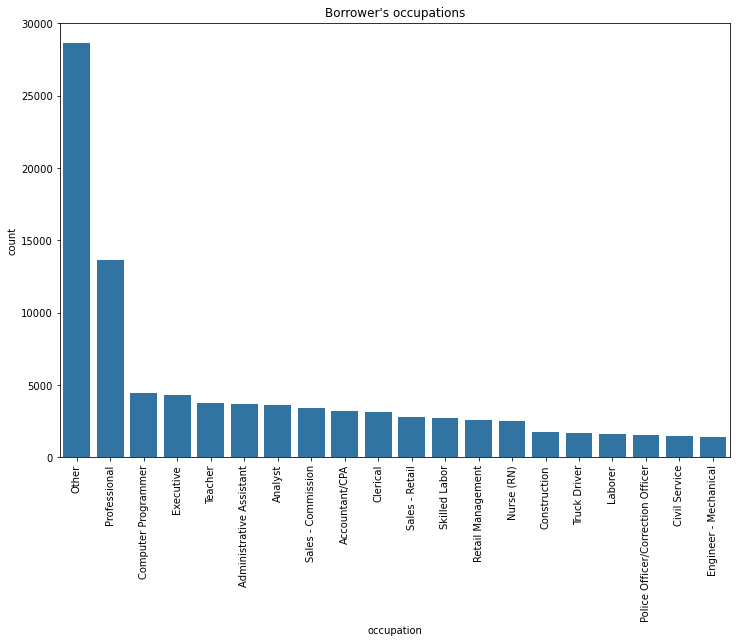

In [7]:
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
occ = df['occupation'].value_counts().index
sb.countplot(data = df, x = 'occupation' , color = base_color,order=occ[:20])
plt.xticks(rotation = 90)
plt.title("Borrower's occupations");

> Most people choose not to disclose their career.

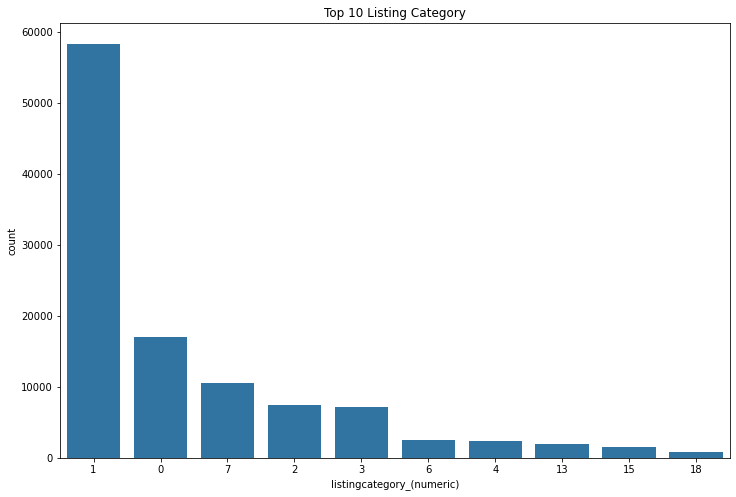

In [8]:
plt.figure(figsize=(12,8))
base_color = sb.color_palette()[0]
lc=df['listingcategory_(numeric)'].value_counts().index
sb.countplot(data = df, x = 'listingcategory_(numeric)' , color = base_color,order=lc[:10])
plt.title("Top 10 Listing Category");
#"0 Debt Consolidation","1 Home Improvement"
#,"2 Business","3 Personal Loan","4 Student Use","5 Auto","6 Other","7 Baby&Adoption","8 Other","9 Baby&Adoption","10 Boat")

> Interesting ! most people take debts to pay other debts 

In [9]:
df['investors'].describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: investors, dtype: float64

In [10]:
#Calculations to choose the appropriate bin size for histogram
(df['investors'].max()-df['investors'].min())/11

108.0

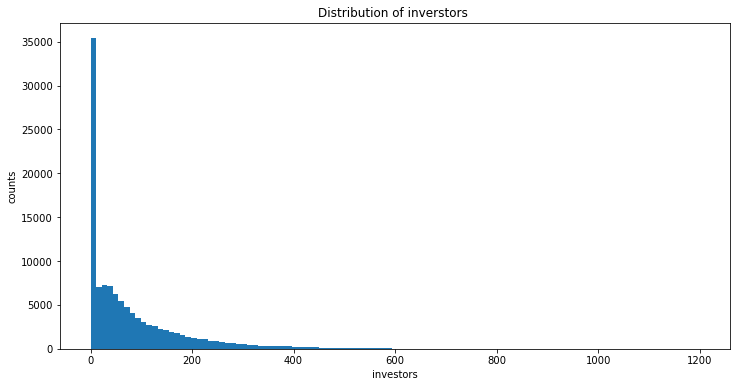

In [11]:
binsize = 11
bins = np.arange(0, df['investors'].max()+binsize, binsize)
plt.figure(figsize=[12, 6])
plt.hist(data = df, x = 'investors', bins = bins)
plt.xlabel('investors')
plt.ylabel('counts')
plt.title("Distribution of inverstors ")
plt.show()

In [12]:
df['investors'].value_counts()


1      27814
2       1386
3        991
4        827
5        753
       ...  
881        1
801        1
752        1
715        1
831        1
Name: investors, Length: 751, dtype: int64

#### 24% of loans got only one investor

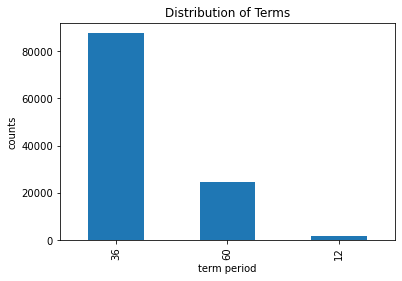

In [13]:
df['term'].value_counts().plot.bar()
plt.xlabel('term period')
plt.ylabel('counts');
plt.title("Distribution of Terms");

> Terms are fixed, most common one is the 3 years debts

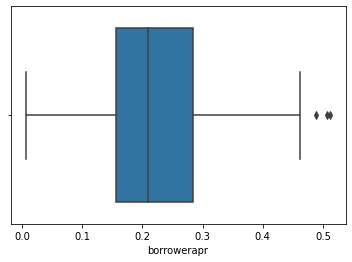

In [14]:
sb.boxplot(df['borrowerapr']);

> The borrower apr is usually between 0.15 and almost 0.3. The rates above 0.45 are considered to be outliers.

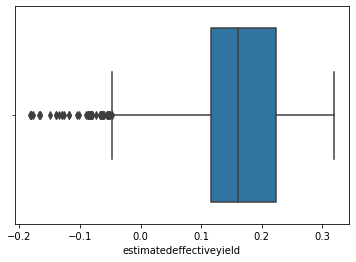

In [15]:
sb.boxplot(df['estimatedeffectiveyield']);

> The estimated effective yield is usually between approximately 0.11 and approximately 0.23 . The rates which are less than -0.5 are considered to be outliers.

In [16]:
df['creditgrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: creditgrade, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No, I did not need to preform any taransformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I only changed one quality issues which is header names, there were in capital letters with spaces.

## Bivariate Exploration

> In this section I will invistigate the realatioship between `BorrowerAPR` and `term`

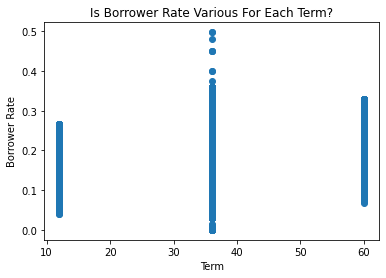

In [25]:
plt.scatter(data = df, x = 'term', y = 'borrowerrate')
plt.xlabel('Term')
plt.ylabel('Borrower Rate')
plt.title("Is Borrower Rate Various For Each Term?");

> Interst rate is higher with 36 term loans 

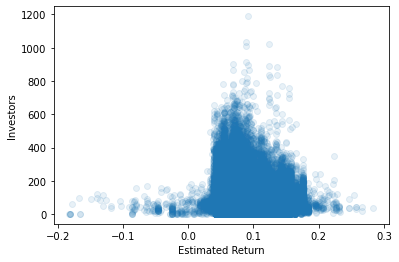

In [18]:
plt.scatter(data = df, x = 'estimatedreturn', y = 'investors',alpha = 1/10)
plt.xlabel('Estimated Return')
plt.ylabel('Investors');

> Apparently higher estimated return does not necessarily attract more investors

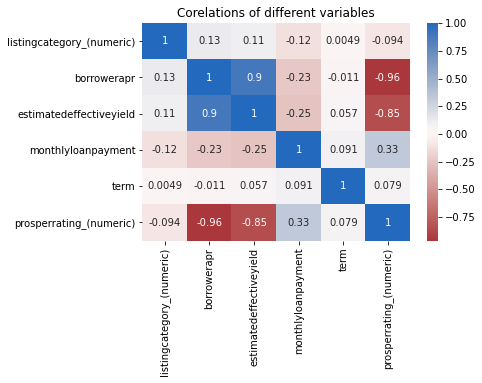

In [19]:
df2=df[['incomerange','listingcategory_(numeric)','borrowerapr','estimatedeffectiveyield' ,'monthlyloanpayment',
        'term', 'prosperrating_(numeric)' ,'incomerange']]
corrMatrix = df2.corr()
sb.heatmap(corrMatrix, annot=True,cmap = 'vlag_r')
plt.title("Corelations of different variables")
plt.show()

Term has week correlations with all variable, This suggests that term is not highly important in comparison with these variables. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The higher the borrower APR the higher the estimated effective yield, which make sice the higher the interst the brrower will pay the higher the profit the lender will make.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I accullay did not expect for the monthly payments to be negatively corrlated with estimated effective yield becuase it makes more since with monthly payments are larger the estimated effective yield will be larger as will. Perhabs there is more to it or this relation does not align with my conclusion 

## Multivariate Exploration

> In this section I will explore what makes loans attracts a high number of inverstores.

In [20]:
df['estimatedeffectiveyield'].value_counts()

 0.2896    3064
 0.2957    1041
 0.2534     966
 0.2437     747
 0.2000     643
           ... 
 0.0134       1
-0.0813       1
 0.0380       1
-0.0332       1
 0.1578       1
Name: estimatedeffectiveyield, Length: 1582, dtype: int64

In [21]:
#Here I took a sample of loans with the highest 15% of investors 
df2= pd.DataFrame(df[df['investors']>=115])

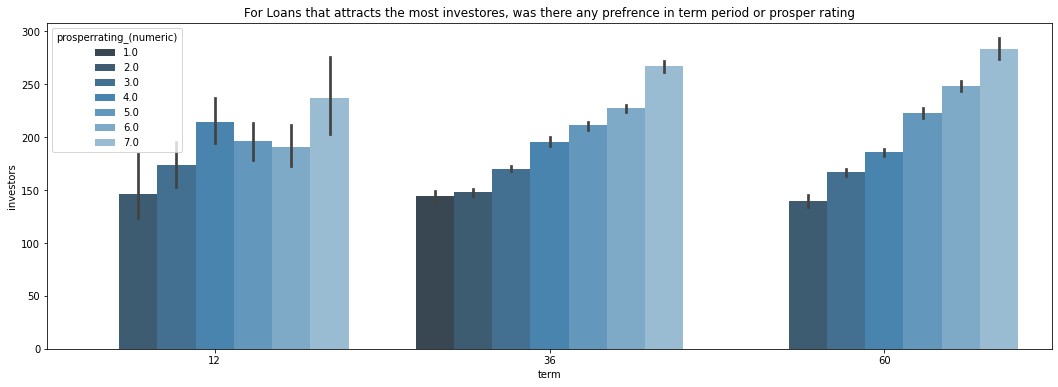

In [22]:
plt.figure(figsize=[18, 6])
sb.barplot(x='term',y='investors',hue='prosperrating_(numeric)',data=df2, palette="Blues_d")
plt.title("For Loans that attracts the most investores, was there any prefrence in term period or prosper rating");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It seems that the term does not effect the likability of attracking a large number of inverstors. However, if a borower has a 7 prosper rating the loan will likely attrack a large number of investors regardless of the term

### Were there any interesting or surprising interactions between features?

> Acullay there wasn't any that I'm aware of

In [23]:
#I have save it beacuse the columns names are diffrent 
df.to_csv('prosperLoanData2.csv')